Images shape: (597, 100, 100)
Labels shape: (597,)


C:\Users\Lenovo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 96, 96, 30)          │             780 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 48, 48, 30)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 46, 46, 15)          │           4,065 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 23, 23, 15)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 7935)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │         396,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 6)                   │             306 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 401,951 (1.53 MB)

 Trainable params: 401,951 (1.53 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 4s 83ms/step - accuracy: 0.3252 - loss: 1.5805 - val_accuracy: 0.0000e+00 - val_loss: 2.7489
Epoch 2/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.8487 - loss: 0.5454 - val_accuracy: 0.9500 - val_loss: 0.2708
Epoch 3/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 0.9822 - loss: 0.0857 - val_accuracy: 0.8833 - val_loss: 0.3243
Epoch 4/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 0.9969 - loss: 0.0184 - val_accuracy: 0.7000 - val_loss: 0.8018
Epoch 5/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 71ms/step - accuracy: 1.0000 - loss: 0.0123 - val_accuracy: 0.9500 - val_loss: 0.0714
Epoch 6/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 65ms/step - accuracy: 1.0000 - loss: 0.0083 - val_accuracy: 0.9333 - val_loss: 0.2128
Epoch 7/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 59ms/step - accuracy: 0.9881 - loss: 0.0220 - val_accuracy: 0.9500 - val_loss: 0.1734
Epoch 8/10
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step - accuracy: 0.9921 - loss: 0.0272 - val_accuracy: 0.9500

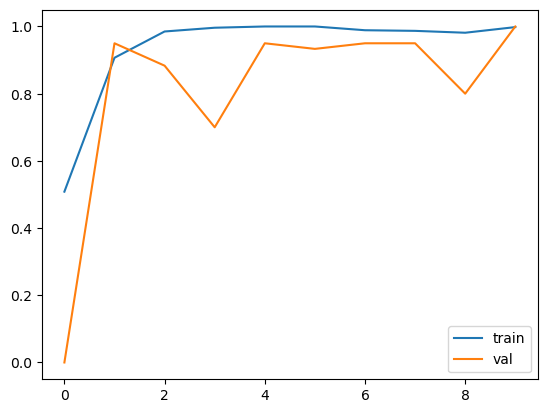

Model saved as final_model.h5


In [1]:
# --- Part 1: Train CNN Model ---

import pickle, os
import numpy as np
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
import matplotlib.pyplot as plt
# Load preprocessed data
with open(os.path.join("data","images.p"),"rb") as f:
    images = pickle.load(f)

with open(os.path.join("data","labels.p"),"rb") as f:
    labels = pickle.load(f)

print("Images shape:", images.shape)
print("Labels shape:", labels.shape)

# Normalize and reshape images
images = images/255.0
images = images.reshape(-1,100,100,1)

# Convert labels to numeric classes
unique_labels = sorted(list(set(labels)))
label_map = {name:i for i,name in enumerate(unique_labels)}
labels_num = np.array([label_map[lbl] for lbl in labels])

# One-hot encode
labels_cat = to_categorical(labels_num)

# Define CNN model
def Lenet_Model(num_classes):
    model = Sequential()
    model.add(Conv2D(30,(5,5),input_shape=(100,100,1),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(15,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Flatten())
    model.add(Dense(50,activation='relu'))
    model.add(Dense(num_classes,activation='softmax'))
    model.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = Lenet_Model(len(unique_labels))
model.summary()

# Train model
history = model.fit(images, labels_cat, validation_split=0.1, epochs=10, batch_size=32)

# Plot accuracy
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='val')
plt.legend()
plt.show()

# Save model
model.save("final_model.h5")
print("Model saved as final_model.h5")

# Save label mapping
with open("label_map.p","wb") as f:
    pickle.dump(label_map,f)


In [2]:
import os
print(os.getcwd())


C:\Users\Lenovo\Desktop\Face Recognition


In [3]:
import os

print(os.path.exists("data/images.p"))  # True or False
print(os.path.exists("data/labels.p"))


True
True


In [4]:
# --- Part 2: Face Detection and Recognition ---

import cv2
import numpy as np
from keras.models import load_model
import pickle

# Load the trained model
model = load_model("final_model.h5")

# Load the label mapping
with open("label_map.p", "rb") as f:
    label_map = pickle.load(f)

# Reverse the label map to get names from class indices
inv_label_map = {v: k for k, v in label_map.items()}

# Load OpenCV's face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Start webcam
cap = cv2.VideoCapture(0)  # use 0 for default camera

while True:
    ret, frame = cap.read()
    if not ret:
        print("Failed to grab frame")
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces
    faces = face_cascade.detectMultiScale(gray, scaleFactor=1.3, minNeighbors=5)

    for (x, y, w, h) in faces:
        # Extract face region
        face_img = gray[y:y+h, x:x+w]
        face_resized = cv2.resize(face_img, (100,100))
        face_resized = face_resized.reshape(1,100,100,1)/255.0

        # Predict label
        pred = model.predict(face_resized)
        class_index = np.argmax(pred)
        name = inv_label_map[class_index]

        # Draw rectangle and label
        cv2.rectangle(frame, (x,y), (x+w, y+h), (0,255,0), 2)
        cv2.putText(frame, name, (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 
                    0.9, (0,255,0), 2)

    cv2.imshow("Face Recognition", frame)

    # Press 'q' to quit
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 148ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━

In [11]:
names = list(label_map.keys())
print("Names (levels) in the model:")
print(names)

Names (levels) in the model:
['babita dash', 'bini', 'siba', 'siboo', 'siva ', 'sneha']
